In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

import numpy as np
import torch
import torch.nn as nn
torch.manual_seed(123)  

# Load the model configuration
model_config_sinc = torch.load('model_config_sinc.pth')

class SincApproximator(nn.Module):
    def __init__(self):
        super(SincApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)  # Additional hidden layer
        self.fc5 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model
model = SincApproximator()

# Step 2: Load the state_dict (weights) into the model
state_dict = torch.load('C:/Users/Asus/trained_model_sinc.pth')
model.load_state_dict(state_dict)

# Step 3: Set the model to evaluation mode for inference
model.eval()

SincApproximator(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=1, bias=True)
)

In [2]:
# To check which files avaible in the directory 
# import os
# checkpoint_dir = 'C:/Users/Asus/'
# files = os.listdir(checkpoint_dir)
# print(files)


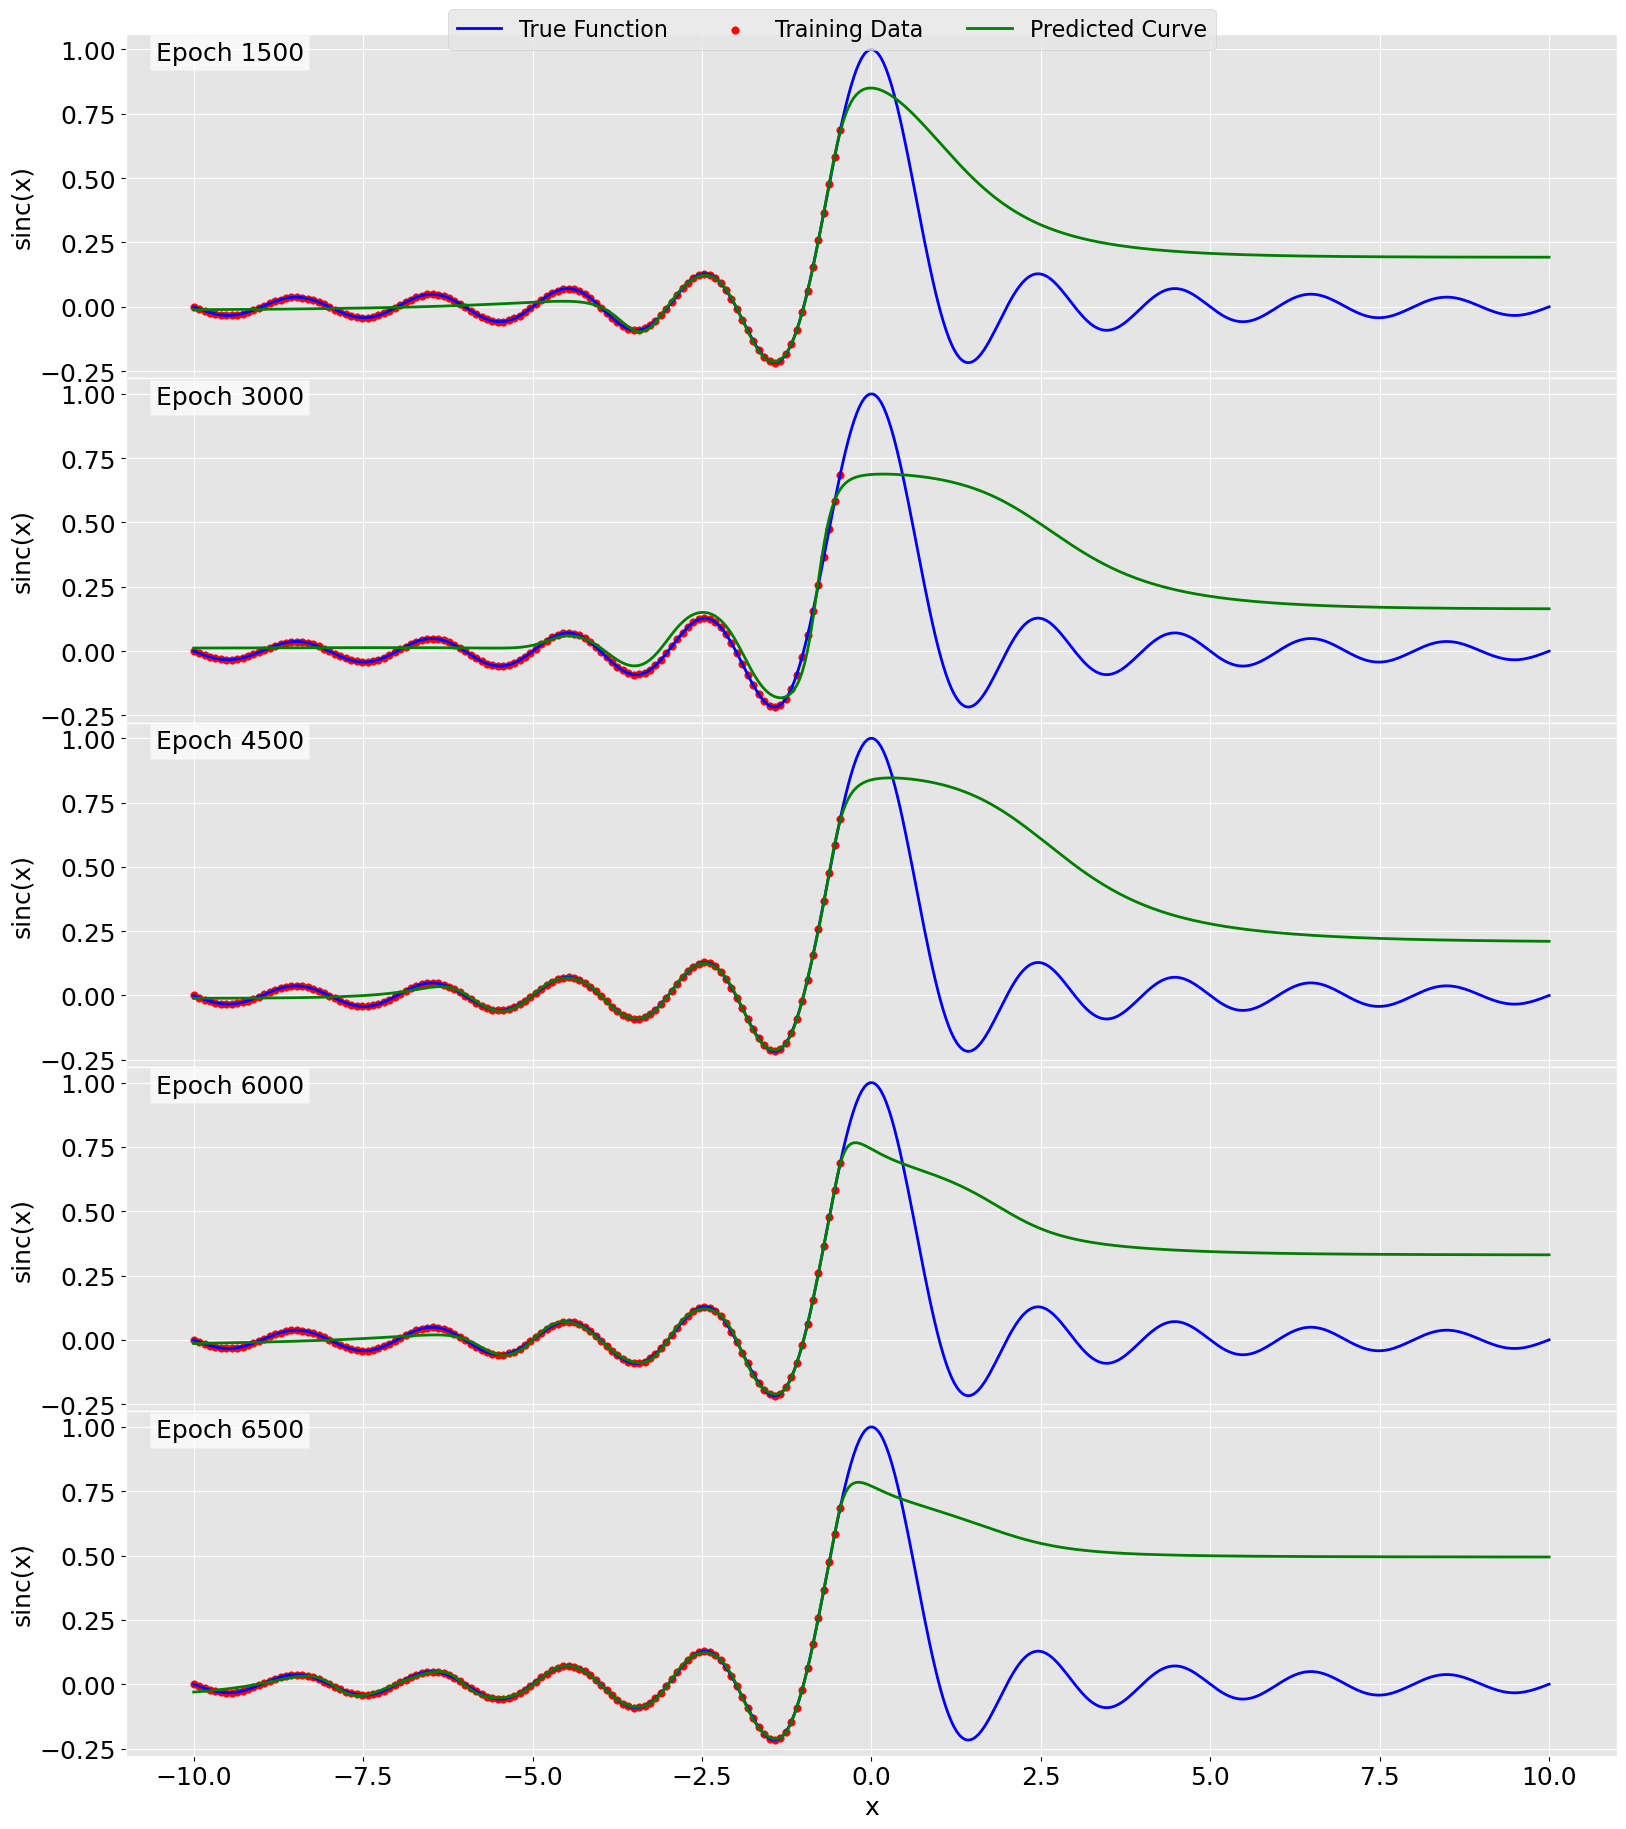

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Enable ggplot style for Matplotlib
plt.style.use('ggplot')

# Define the model
class SincApproximator(nn.Module):
    def __init__(self):
        super(SincApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize model
model = SincApproximator()

def load_model_state(epoch):
    state_dict_path = f'trained_model_sinc_epoch_{epoch}.pth'
    if not os.path.isfile(state_dict_path):
        raise FileNotFoundError(f"Checkpoint file not found: {state_dict_path}")
    state_dict = torch.load(state_dict_path)
    model.load_state_dict(state_dict)

# Generate data
x = np.linspace(-10, 10, 500)
y = np.sinc(x)
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
data_slice = 240
# Slice data for training from the left-hand side
x_train = x[0:data_slice:2]  # [0:240:2] from LHS
y_train = y[0:data_slice:2]  # [0:240:2] from LHS
# Convert train data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) 

# Epochs to visualize (adjust to available checkpoints)
epochs_to_visualize = [1500, 3000, 4500, 6000, 6500]

# Create subplots (5 rows, 1 column)
num_epochs = len(epochs_to_visualize)
fig, axes = plt.subplots(num_epochs, 1, figsize=(16, 18), sharex=True)

# Define labels for the legend
labels = ['True Function', 'Training Data', 'Predicted Curve']
colors = ['blue', 'red', 'green']

# Plot model predictions for each epoch in separate subplots
for i, epoch in enumerate(epochs_to_visualize):
    try:
        load_model_state(epoch)  # Load model state for the current epoch
    except FileNotFoundError as e:
        print(e)
        continue  # Skip this epoch if the file is not found
    
    model.eval()
    with torch.no_grad():
        y_pred = model(x_tensor)  # Predict using the model
        
    ax = axes[i]
    
    # Plot the true function
    ax.plot(x_tensor.numpy(), y_tensor.numpy(), color='blue', linewidth=2)
    
    # Plot the training data
    ax.scatter(x_train_tensor.numpy(), y_train_tensor.numpy(), color='red', s=28)
    
    # Plot the predicted curve
    ax.plot(x_tensor.numpy(), y_pred.numpy(), color='green', linewidth=2)
    
    
    # Add text inside the plot at the top left corner
    ax.text(0.02, 0.98, f'Epoch {epoch}', transform=ax.transAxes, fontsize=18, 
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))
    
    
    
    # Set axis labels with dark black color
    ax.set_ylabel('$y=sinc(x)$', fontsize=18, color='black')
    
    if i == num_epochs - 1:
        ax.set_xlabel('x', fontsize=18, color='black')
        
    # Set tick parameters to ensure the tick labels are dark black
    ax.tick_params(axis='both', labelsize=18, colors='black')

#     ax.set_ylabel('sinc(x)', fontsize=18)
    
#     if i == num_epochs - 1:
#         ax.set_xlabel('x', fontsize=18)
        
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=18)

# Add a single legend at the top of the figure
fig.legend(labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize=16)

# Adjust the spacing between subplots to make room for the legend
plt.tight_layout()
plt.subplots_adjust(top=1.0, hspace=0.0)  

# Save the figure with high resolution
output_path = 'Sinc_Merged_output.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight')   

plt.show()
plt.close()


In [5]:



##---------------------------------------------------SIDE BY SIDE-----------------------------------------------------##





# import torch
# import torch.nn as nn
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Enable ggplot style for Matplotlib
# plt.style.use('ggplot')

# # Define the model
# class SincApproximator(nn.Module):
#     def __init__(self):
#         super(SincApproximator, self).__init__()
#         self.fc1 = nn.Linear(1, 32)
#         self.fc2 = nn.Linear(32, 32)
#         self.fc3 = nn.Linear(32, 32)
#         self.fc4 = nn.Linear(32, 32)
#         self.fc5 = nn.Linear(32, 1)
        
#     def forward(self, x):
#         x = torch.tanh(self.fc1(x))
#         x = torch.tanh(self.fc2(x))
#         x = torch.tanh(self.fc3(x))
#         x = torch.tanh(self.fc4(x))
#         x = self.fc5(x)
#         return x

# # Initialize model
# model = SincApproximator()

# def load_model_state(epoch):
#     state_dict_path = f'trained_model_sinc_epoch_{epoch}.pth'
#     if not os.path.isfile(state_dict_path):
#         raise FileNotFoundError(f"Checkpoint file not found: {state_dict_path}")
#     state_dict = torch.load(state_dict_path)
#     model.load_state_dict(state_dict)
    
    
    
    
# # Generate data
# x = np.linspace(-10, 10, 500)
# y = np.sinc(x)
# # Convert data to PyTorch tensors
# x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
# y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
# data_slice = 240
# # Slice data for training from the left-hand side
# x_train = x[0:data_slice:2]  # [0:240:5] from LHS
# y_train = y[0:data_slice:2]  # [0:240:5] from LHS
# # Convert train data to PyTorch tensors
# x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) 




# # Epochs to visualize (adjust to available checkpoints)
# epochs_to_visualize = [1500, 3000, 4500, 6000, 6500]

# # Create subplots with shared x and y axes
# num_epochs = len(epochs_to_visualize)
# fig, axes = plt.subplots(1, num_epochs, figsize=(35, 5), sharex=True, sharey=True)

# # # Consistent axis limits for all subplots
# # x_limits = (-10, 10)
# # y_limits = (-0.5, 1.3)

# # Plot model predictions for each epoch in separate subplots
# for i, epoch in enumerate(epochs_to_visualize):
#     try:
#         load_model_state(epoch)  # Load model state for the current epoch
#     except FileNotFoundError as e:
#         print(e)
#         continue  # Skip this epoch if the file is not found
    
#     model.eval()
#     with torch.no_grad():
#         y_pred = model(x_tensor)  # Predict using the model
        
#     ax = axes[i]
    
#     # Plot the true function
#     ax.plot(x_tensor.numpy(), y_tensor.numpy(), label='True Function', color='blue', linewidth=2)
    
#     # Plot the training data using plot() with markers instead of scatter()
#     ax.plot(x_train_tensor.numpy(), y_train_tensor.numpy(), 'ro', label='Training Data')
    
#     # Plot the predicted curve
#     ax.plot(x_tensor.numpy(), y_pred.numpy(), label='Predicted Curve', color='green', linewidth=2)

# #     # Set consistent x and y limits across subplots
# #     ax.set_xlim(x_limits)  # Ensure consistent x-axis limits
# #     ax.set_ylim(y_limits)  # Ensure consistent y-axis limits

# #     # Force aspect ratio to be consistent
# #     ax.set_aspect(aspect='auto')

# #     ax.set_title(f'Training Step {epoch}')
# #     ax.set_xlabel('x')
# #     if i == 0:
# #         ax.set_ylabel('sinc(x)')
# #     ax.legend()
# #     ax.grid(True)

# # # Apply tight layout
# # plt.tight_layout()

# # # Save the figure with moderate resolution
# # output_path = 'moderate_res_plot_fixed_aspect.png'
# # plt.savefig(output_path, dpi=800, bbox_inches='tight')  

# # plt.show()




#  # Add text inside the plot at the top left corner
#     ax.text(0.02, 0.98, f'Epoch {epoch}', transform=ax.transAxes, fontsize=16, 
#             verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7))

#     ax.set_ylabel('sinc(x)', fontsize=16)

#     ax.set_ylabel('sinc(x)', fontsize=16)
    
#     if i == num_epochs - 1:
#         ax.set_xlabel('x', fontsize=16)
        
#     ax.legend(fontsize=16)
#     ax.grid(True)
#     ax.tick_params(axis='both', labelsize=16)

# plt.tight_layout()

# # Save the figure with high resolution
# output_path = 'Sinc_Merged_output.png'
# plt.savefig(output_path, dpi=800, bbox_inches='tight')   

# plt.show()
# plt.close()